In [16]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ
from qiskit.tools.visualization import plot_histogram
import numpy as np
import pickle
qiskit.__version__

'0.9.0'

In [18]:
class InteractiveCircuit:


    def __init__(self, size = 4, simulated = True):
        
        qr = QuantumRegister(size)
        cr = ClassicalRegister(size)

        # Initialisation part
        self.circuit_init = QuantumCircuit(qr, cr)
        self.circuit_init.h([0])
        self.circuit_init.cx([0], [1])
        self.circuit_init.rx(np.pi/3, [2])
        self.circuit_init.cx([2],[3])
        #self.circuit_init.x([3])
        pickle.dump( self.circuit_init, open( "Entangled_Rx.p", "wb" ) )


        # Editable part
        self.circuit_main = QuantumCircuit(qr, cr)
        
        # Measurement part
        self.circuit_mes = QuantumCircuit(qr, cr)
        self.circuit_mes.measure(qr, cr)

        self.sim_backend = qiskit.Aer.get_backend("qasm_simulator")

        #IBMQ.load_account()
        #provider = IBMQ.get_provider(hub = "ibm-q")
        #print("Available backends:")
        #for backend in provider.backends():
        #    print('    - %s' % backend)

        #self.real_backend = provider.get_backend("ibmqx4") # Only need 4 qubits for now

        self.simulated = simulated


    def probe(self, nshots = 10000):

        counts = qiskit.execute((self.circuit_init + self.circuit_main + self.circuit_mes), self.sim_backend, shots = nshots).result().get_counts()

        plot_histogram(counts).savefig("histogram16.png")

        return counts


    def play(self):

        job = qiskit.execute((self.circuit_init + self.circuit_main + self.circuit_mes), self.sim_backend if self.simulated else real_backend, shots = 1)

        for k in job.result().get_counts().keys():
            return k


    def add_gate(self, gate_string, qubits):
        
        if gate_string.lower() == 'x':
            self.circuit_main.x(qubits)
        elif gate_string.lower() == 'z':
            self.circuit_main.z(qubits)
        elif gate_string.lower() == 'h':
            self.circuit_main.h(qubits)
        elif gate_string.lower() == 'cx':
            self.circuit_main.cx(qubits)


    def export_circuit(self):
        
        diagram = (self.circuit_init + self.circuit_main).draw(output = "mpl") 
        diagram.savefig("circuit.png", format = "png")

        return diagram

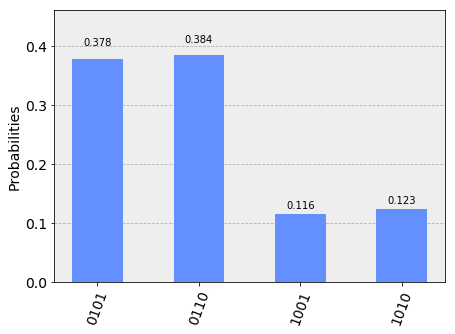

In [19]:
ic = InteractiveCircuit()
ic.add_gate("X", [0, 2])
ic.export_circuit()
shots = 10000
counts = ic.probe(10000)
probs = sorted([(i, c/shots) for i, c in counts.items()])
plot_histogram(counts)